**VIDEO GAME RECOMMENDER SYSTEM WITH NEURAL NETWORKS**

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
game_reviews = pd.read_csv('ratings_latest.csv', sep=',')

In [21]:
print (game_reviews.shape)

(25733928, 3)


The dataset comprises **25.733.928** video game ownerships.

In [3]:
game_reviews.head()

,id,rate,appid
0,76561197960265729,1.0,10
1,76561197960265729,1.0,20
2,76561197960265729,1.0,30
3,76561197960265729,1.0,40
4,76561197960265729,1.0,50


In [25]:
game_reviews["rate"].describe()

count    2.573393e+07
mean     1.275410e+00
std      7.960212e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.100000e+00
max      5.950000e+00
Name: rate, dtype: float64

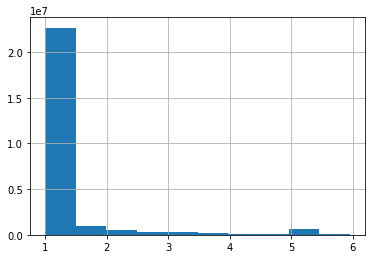

In [6]:
game_reviews["rate"].hist(bins=10)

Most people rate their items around 1. This means that they have invested 0 - 20% of their time to their games, which in my perspective makes sense, since the user's time is dispersed across multiple games.

In [7]:
users = game_reviews.id.unique()
user_map = {i:val for i,val in enumerate(users)}
inverse_user_map = {val:i for i,val in enumerate(users)}
games = game_reviews.appid.unique()
game_map = {i:val for i,val in enumerate(games)}
inverse_game_map = {val:i for i,val in enumerate(games)}

game_reviews["id"] = game_reviews["id"].map(inverse_user_map)
game_reviews["old_id"] = game_reviews["appid"] # copying for join with metadata
game_reviews["appid"] = game_reviews["appid"].map(inverse_game_map)


print ("A total of: ", users.shape[0], "unique users")
print ("A total of: ", games.shape[0], "unique games")

A total of:  676668 unique users
A total of:  18865 unique games


From the dataset, there are around 676668 distinct users and 18865 games.

In [8]:
users_nb = game_reviews['id'].value_counts().reset_index()
users_nb.columns= ['id','nb_lines']
users_nb['nb_lines'].describe()

count    676668.000000
mean         38.030361
std         123.929002
min           1.000000
25%           4.000000
50%           8.000000
75%          22.000000
max       10440.000000
Name: nb_lines, dtype: float64

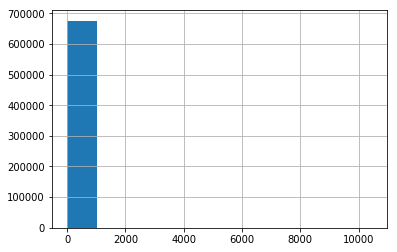

In [9]:
import seaborn
users_nb['nb_lines'].hist()

50% of the users in our dataset owns no more than 13 video games, whereas the maximum amount of games a user currently has is 364650.

In [10]:
games_nb = game_reviews['old_id'].value_counts().reset_index()
games_nb.columns= ['old_id','nb_lines']
games_nb['nb_lines'].describe()

count     18865.000000
mean       1364.109621
std        8333.452088
min           1.000000
25%          13.000000
50%          86.000000
75%         510.000000
max      364650.000000
Name: nb_lines, dtype: float64

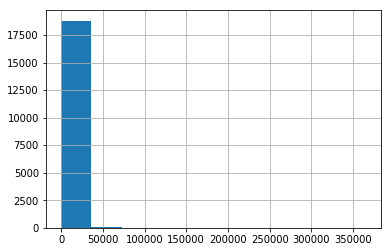

In [11]:
games_nb['nb_lines'].hist()

50% of the games have 99 ownerships or less, while 75% of the games have at most 606 ownerships.

In [12]:
a = game_reviews.dropna()[['id','rate','appid']]

In [27]:
pd.set_option('display.max_colwidth', 100)
a.head(10)

,id,rate,appid
0,0,1.0,0
1,0,1.0,1
2,0,1.0,2
3,0,1.0,3
4,0,1.0,4
5,0,1.0,5
6,0,1.0,6
7,0,1.0,7
8,0,1.0,8
9,0,1.0,9


In [15]:
a.shape[0]/float(game_reviews.shape[0])

1.0

In [45]:
# Game metadata
all_info = pd.read_csv('metadata.csv', sep=',')
all_info['appname'] = all_info['appname']
all_info['genres'] = all_info['genres'].fillna('no_data')


# Remap
# all_info['appid'] = all_info['id'].astype(str).map(inverse_game_map)

all_info['appid'] = all_info['appid'].astype(int).map(inverse_game_map).fillna('no_data') # remap

print (all_info)


# # # Add count
# games_nb["old_id"] = games_nb["old_id"].astype(int).values
# all_info =  pd.merge(all_info,games_nb,how='left',left_on='appid',right_on='old_id')

# print (all_info)
# a = all_info.dropna()[['appid','appname', 'nb_lines']]
# # all_info.dropna().sample(10)[['appid','appname','rate','nb_lines']]
# pd.set_option('display.max_colwidth', 100)
# a.head(10)

         appid  \
0            0   
1            1   
2            2   
3            3   
4            4   
5            5   
6            6   
7            7   
8      no_data   
9            8   
10           9   
11     no_data   
12     no_data   
13          10   
14          11   
15          12   
16          13   
17          14   
18          15   
19          16   
20          17   
21          18   
22     no_data   
23          19   
24     no_data   
25          20   
26          21   
27     no_data   
28          22   
29     no_data   
...        ...   
37635  no_data   
37636  no_data   
37637  no_data   
37638  no_data   
37639  no_data   
37640  no_data   
37641  no_data   
37642  no_data   
37643  no_data   
37644  no_data   
37645  no_data   
37646  no_data   
37647  no_data   
37648  no_data   
37649    18846   
37650  no_data   
37651  no_data   
37652  no_data   
37653  no_data   
37654  no_data   
37655  no_data   
37656  no_data   
37657  no_data   
37658  no_